# Quickstart

This is a minimal Tidy3D script showing the FDTD simulation of a dielectric cube in the presence of a point dipole.

Before running this notebook, make sure to have:

1. [Installed tidy3d](../quickstart.html#installation-of-tidy3d-python-api)
2. [Generate your free API key](https://tidy3d.simulation.cloud/account)
3. [Optional - Configured your API key](../quickstart.html#installation-of-tidy3d-python-api#linking-registration)

In [1]:
# import packages and authenticate (if needed)
import matplotlib.pylab as plt
import numpy as np
import tidy3d as td
import tidy3d.web as web

# web.configure("YOUR API KEY GOES HERE")

In [2]:
lda0 = 0.75  # wavelength of interest (length scales are micrometers in Tidy3D)
freq0 = td.C_0 / lda0  # frequency of interest

Create a [Structure](../api/_autosummary/tidy3d.Structure.html#tidy3d.Structure) from a [Geometry](../api/geometry.html) like this rectangular prism [Box](../api/_autosummary/tidy3d.Box.html#tidy3d.Box) and assign a [Medium](../api/_autosummary/tidy3d.Medium.html#tidy3d.Medium) to represent its optical properties.

In [3]:
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), medium=td.Medium(permittivity=2.0)
)

Create a [Source](../api/sources.html). In this case, it is a [PointDipole](../api/_autosummary/tidy3d.PointDipole.html#tidy3d.PointDipole), which is a uniform current source with a zero size.

In [4]:
# create source
source = td.PointDipole(
    center=(-1.5, 0, 0),  # position of the dipole
    source_time=td.GaussianPulse(freq0=freq0, fwidth=freq0 / 10.0),  # time profile of the source
    polarization="Ey",  # polarization of the dipole
)

Create a [Monitor](../api/monitors.html) like a [FieldMonitor](../api/_autosummary/tidy3d.FieldMonitor.html#tidy3d.FieldMonitor) to record electromagnetic fields in the frequency domain at `freq0`. 

In [5]:
# create monitor
monitor = td.FieldMonitor(
    center=(0, 0, 0),  # center of the monitor
    size=(td.inf, td.inf, 0),  # size of the monitor
    freqs=[freq0],  # frequency points to record the fields at
    name="fields",
)

All these components are used to create a Tidy3D [Simulation](../api/_autosummary/tidy3d.Simulation.html):

In [6]:
sim = td.Simulation(
    size=(4, 3, 3),  # simulation domain size
    grid_spec=td.GridSpec.auto(
        min_steps_per_wvl=25
    ),  # automatic nonuniform FDTD grid with 25 grids per wavelength in the material
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=3e-13,  # physical simulation time in second
)

In [7]:
# visualize in 3D
sim.plot_3d()

In [8]:
print(
    f"simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells) / 1e6)} million cells."
)

simulation grid is shaped [179, 147, 147] for 3 million cells.


The [python web API](../api/submit_simulations.html) is used to [run](../api/_autosummary/tidy3d.web.run.html#tidy3d.web.run) your simulation quickly in the cloud. The output data is stored in a [SimulationData](../api/_autosummary/tidy3d.SimulationData.html#tidy3d.SimulationData) container.

In [9]:
# run simulation
data = td.web.run(sim, task_name="quickstart", path="data/data.hdf5", verbose=True)

19:51:13 Eastern Daylight Time Created task 'quickstart' with task_id           
                               'fdve-53d17831-25aa-4218-aefc-b407d409c5a3' and  
                               task_type 'FDTD'.

                               View task using web UI at                        
                               ]8;id=849808;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53d17831-25aa-4218-aefc-b407d409c5a3\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=898981;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53d17831-25aa-4218-aefc-b407d409c5a3\taskId]8;;\
                               ]8;id=849808;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53d17831-25aa-4218-aefc-b407d409c5a3\=]8;;\]8;id=290255;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53d17831-25aa-4218-aefc-b407d409c5a3\fdve]8;;\]8;id=849808;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53d17831-25aa-4218-aefc-b407d409c5a3\-53d17831-25aa-4218-aefc-b407d409c5a3']8;;\.

                               Task folder: ]8;id=847737;https://tidy3d.simulation.cloud/folders/639eb096-a602-4b56-a502-cac1f18f9557\'default']8;;\.

Output()

19:51:14 Eastern Daylight Time Maximum FlexCredit cost: 0.025. Minimum cost     
                               depends on task execution details. Use           
                               'web.real_cost(task_id)' to get the billed       
                               FlexCredit cost after a simulation run.

19:51:15 Eastern Daylight Time status = queued

                               To cancel the simulation, use                    
                               'web.abort(task_id)' or 'web.delete(task_id)' or 
                               abort/delete the task in the web UI. Terminating 
                               the Python script will not stop the job running  
                               on the cloud.

Output()

19:51:47 Eastern Daylight Time status = preprocess

19:51:51 Eastern Daylight Time starting up solver

                               running solver

Output()

19:51:52 Eastern Daylight Time early shutoff detected at 20%, exiting.

                               status = postprocess

Output()

19:51:54 Eastern Daylight Time status = success

19:51:56 Eastern Daylight Time View simulation result at                        
                               ]8;id=308423;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53d17831-25aa-4218-aefc-b407d409c5a3\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=517778;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53d17831-25aa-4218-aefc-b407d409c5a3\taskId]8;;\
                               ]8;id=308423;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53d17831-25aa-4218-aefc-b407d409c5a3\=]8;;\]8;id=156203;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53d17831-25aa-4218-aefc-b407d409c5a3\fdve]8;;\]8;id=308423;https://tidy3d.simulation.cloud/workbench?taskId=fdve-53d17831-25aa-4218-aefc-b407d409c5a3\-53d17831-25aa-4218-aefc-b407d409c5a3']8;;\.

Output()

19:51:58 Eastern Daylight Time loading simulation from data/data.hdf5

In [10]:
# see the log
print(data.log)

[23:51:45] INFO: Auto meshing using wavelength 0.7500 defined from sources.     
           INFO: Auto meshing using wavelength 0.7500 defined from sources.     
           USER: Simulation domain Nx, Ny, Nz: [179, 147, 147]                  
           USER: Applied symmetries: (0, 0, 0)                                  
           USER: Number of computational grid points: 4.0184e+06.               
           USER: Subpixel averaging method: SubpixelSpec(attrs={},              
           dielectric=PolarizedAveraging(attrs={}, type='PolarizedAveraging'),  
           metal=Staircasing(attrs={}, type='Staircasing'),                     
           pec=PECConformal(attrs={}, type='PECConformal',                      
           timestep_reduction=0.3), lossy_metal=SurfaceImpedance(attrs={},      
           type='SurfaceImpedance', timestep_reduction=0.0),                    
           type='SubpixelSpec')                                                 
           USER: Number of t

This monitor data can be easily plotted through available [plot methods](../api/_autosummary/tidy3d.SimulationData.html#tidy3d.SimulationData.plot_field). You can also save, modify, and custom plot the raw [FieldData](../api/_autosummary/tidy3d.FieldData.html) and more.

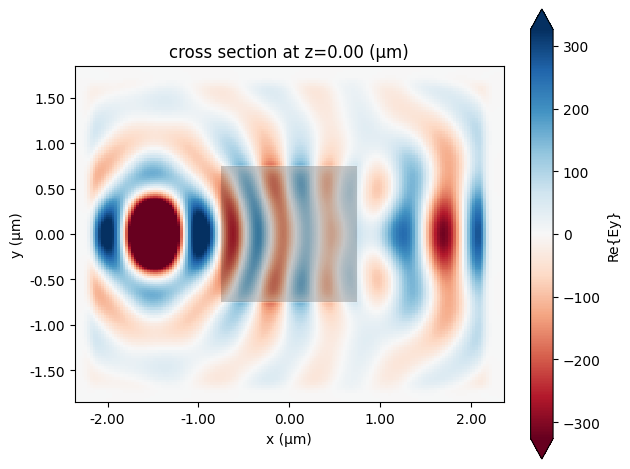

In [11]:
# plot the field data stored in the monitor
ax = data.plot_field("fields", "Ey", z=0)

See all our [examples](https://www.flexcompute.com/tidy3d/learning-center/example-library/) to help you with your own designs!